***Synthetic Fraud Detection Data***

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [296]:
import warnings
warnings.filterwarnings("ignore")

In [298]:
Data=pd.read_csv('Datasets.csv')
Data

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,0,Current,3/1/2018,Afternoon,0.0
10123,10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,0,Savings,5/1/2018,Morning,0.0
10124,10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,0,Savings,7/1/2018,Night,0.0
10125,10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,0,Savings,6/1/2018,Night,0.0


***Data Cleaning***

In [301]:
Data=pd.read_csv('Datasets.csv',index_col=0)
Data.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
Unnamed: 0,,,,,,,,,,,,,,,,
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


In [303]:
Data.tail()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
Unnamed: 0,,,,,,,,,,,,,,,,
10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,0,Current,3/1/2018,Afternoon,0.0
10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,0,Savings,5/1/2018,Morning,0.0
10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,0,Savings,7/1/2018,Night,0.0
10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,0,Savings,6/1/2018,Night,0.0
10126,7,PAYMENT,Cuba,8126.71,C1639296014,6423.0,0.00,M129774606,0.0,0.0,11,0,Current,2/1/2018,Afternoon,0.0


In [305]:
Data.size

162032

In [307]:
Data.shape

(10127, 16)

In [309]:
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud
count,10127.000000,1.012500e+04,1.012500e+04,1.012700e+04,1.012600e+04,1.012500e+04,10127.000000,10127.0,10125.000000
mean,4.214279,1.048869e+05,8.836965e+05,9.044703e+05,9.335393e+05,1.109315e+06,10.513183,0.0,0.006716
std,2.484139,2.706369e+05,2.124554e+06,2.169946e+06,2.677976e+06,3.048644e+06,5.809233,0.0,0.081680
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
25%,1.000000,4.397380e+03,1.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.0,0.000000
50%,5.000000,1.279831e+04,2.136300e+04,1.021224e+04,0.000000e+00,0.000000e+00,10.000000,0.0,0.000000
75%,7.000000,1.143818e+05,1.724320e+05,1.707240e+05,2.819345e+05,2.523925e+05,16.000000,0.0,0.000000
max,7.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,2.260000e+07,20.000000,0.0,1.000000


In [311]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10127 non-null  int64  
 1   type                 10123 non-null  object 
 2   branch               10127 non-null  object 
 3   amount               10125 non-null  float64
 4   nameOrig             10121 non-null  object 
 5   oldbalanceOrg        10125 non-null  float64
 6   newbalanceOrig       10127 non-null  float64
 7   nameDest             10121 non-null  object 
 8   oldbalanceDest       10126 non-null  float64
 9   newbalanceDest       10125 non-null  float64
 10  unusuallogin         10127 non-null  int64  
 11  isFlaggedFraud       10127 non-null  int64  
 12  Acct type            10117 non-null  object 
 13  Date of transaction  10120 non-null  object 
 14  Time of day          10125 non-null  object 
 15  isFraud              10125 non-null  floa

In [313]:
Data.isnull().sum()

step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64

***Handling Missing Values***

In [316]:
Data['type']=Data['type'].fillna(Data['type'].mode()[0])

In [318]:
Data['amount'].fillna(Data['oldbalanceOrg']-Data['newbalanceOrig'],inplace=True)

In [320]:
Data['nameOrig'].fillna('Unknown', inplace=True)

In [322]:
Data['oldbalanceOrg']=Data['oldbalanceOrg'].fillna(Data['newbalanceOrig'] + Data['amount'])

In [324]:
Data['nameDest'].fillna('Unknown', inplace=True)

In [326]:
Data['oldbalanceDest'].fillna(0,inplace=True)
Data['newbalanceDest'].fillna(0,inplace=True)

In [328]:
Data['Acct type'].fillna('Unknown',inplace=True)

In [330]:
Data['Date of transaction'].fillna(method='bfill', inplace=True)

In [332]:
Data['Time of day'].fillna(method='bfill', inplace=True)

In [334]:
Data=Data.dropna(subset=['isFraud'])

In [336]:
Data.isnull().sum()

step                   0
type                   0
branch                 0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
unusuallogin           0
isFlaggedFraud         0
Acct type              0
Date of transaction    0
Time of day            0
isFraud                0
dtype: int64

In [338]:
Data.duplicated().sum()

0

***Visualization***

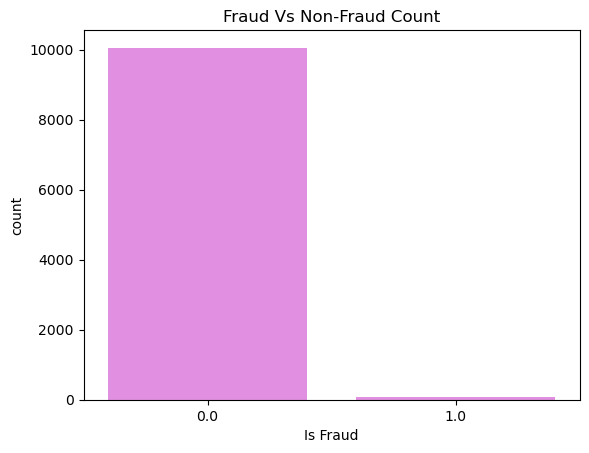

In [341]:
sns.countplot(x='isFraud',data=Data,color='violet')
plt.title("Fraud Vs Non-Fraud Count")
plt.xlabel('Is Fraud')
plt.ylabel('count')
plt.show()

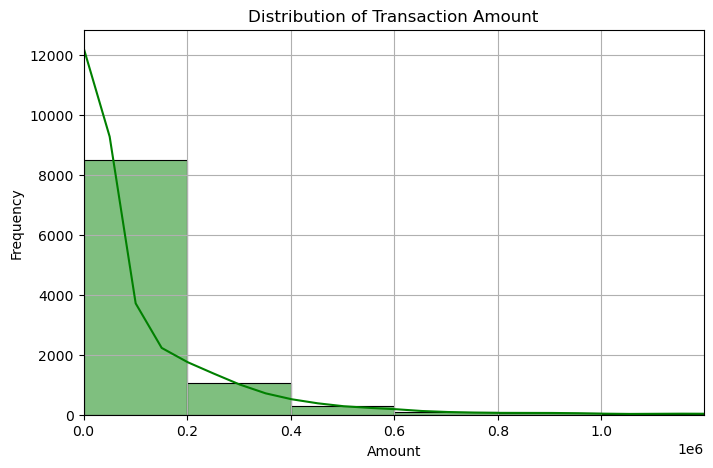

In [343]:
plt.figure(figsize=(8,5))
sns.histplot(Data['amount'],bins=50,color='green',kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0,Data['amount'].quantile(0.99))
plt.grid()
plt.show()

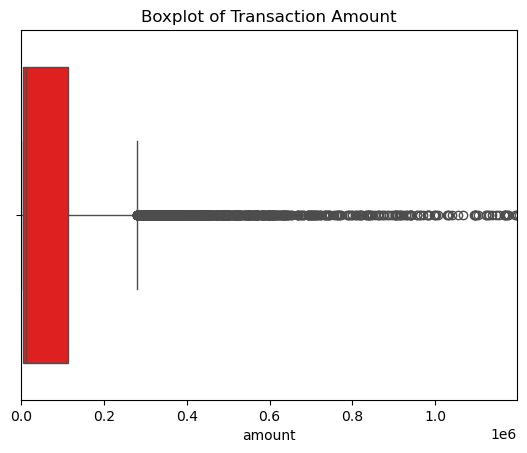

In [345]:
sns.boxplot(x=Data['amount'],color='red')
plt.title('Boxplot of Transaction Amount')
plt.xlim(0,Data['amount'].quantile(0.99))
plt.show()

In [347]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig']  

for col in numeric_cols:
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = Data[(Data[col] < lower_bound) | (Data[col] > upper_bound)]
    print(f"\nOutliers in {col}:")
    print(outliers[[col]])


Outliers in amount:
                amount
Unnamed: 0            
24           311685.89
84           379856.23
85          1505626.01
86           554026.99
88           761507.39
...                ...
10109       1719356.16
10110       2153550.39
10112        599428.20
10114       1174905.93
10115        621032.74

[1059 rows x 1 columns]

Outliers in oldbalanceOrg:
            oldbalanceOrg
Unnamed: 0               
14              503264.00
62              882770.00
63              874042.26
241            6313782.05
242            6309146.87
...                   ...
9817           8427769.43
10003           438279.00
10063           433084.38
10102           673424.52
10103           666682.71

[2032 rows x 1 columns]

Outliers in newbalanceOrig:
            newbalanceOrig
Unnamed: 0                
14               499165.22
62               874042.26
63               871442.79
241             6309146.87
242             6307878.90
...                    ...
9816            842

In [349]:
Data = Data[(Data['amount'] >= lower_bound) & (Data['amount'] <= upper_bound)]


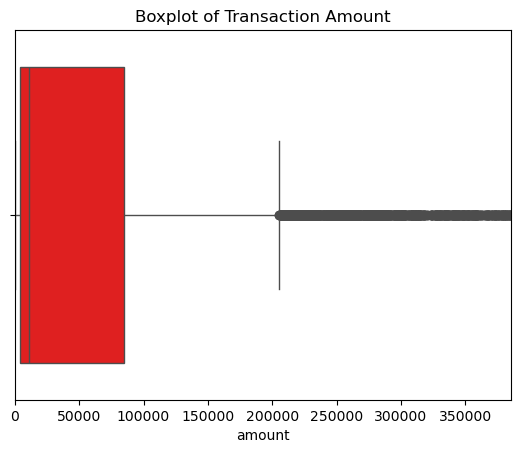

In [351]:
sns.boxplot(x=Data['amount'],color='red')
plt.title('Boxplot of Transaction Amount')
plt.xlim(0,Data['amount'].quantile(0.99))
plt.show()

In [353]:
Data.shape

(9597, 16)

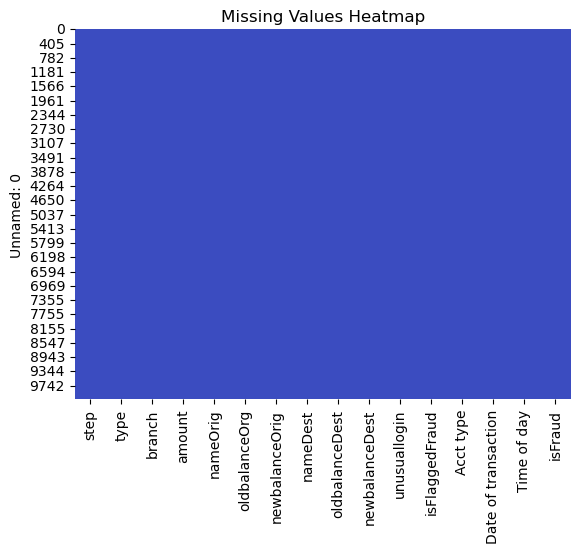

In [355]:
sns.heatmap(Data.isnull(),cbar=False,cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

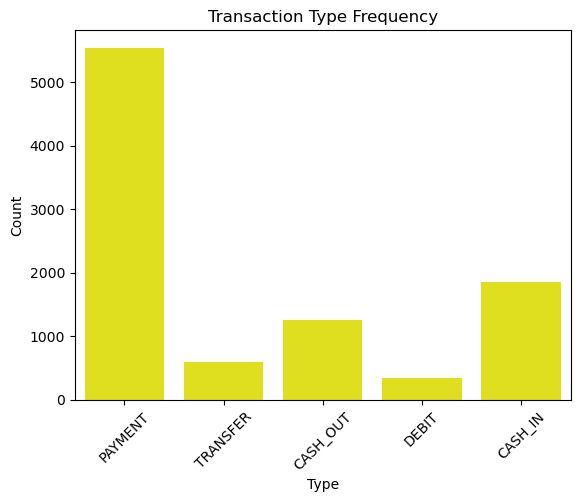

In [356]:
sns.countplot(x='type',data=Data,color='yellow')
plt.title('Transaction Type Frequency')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

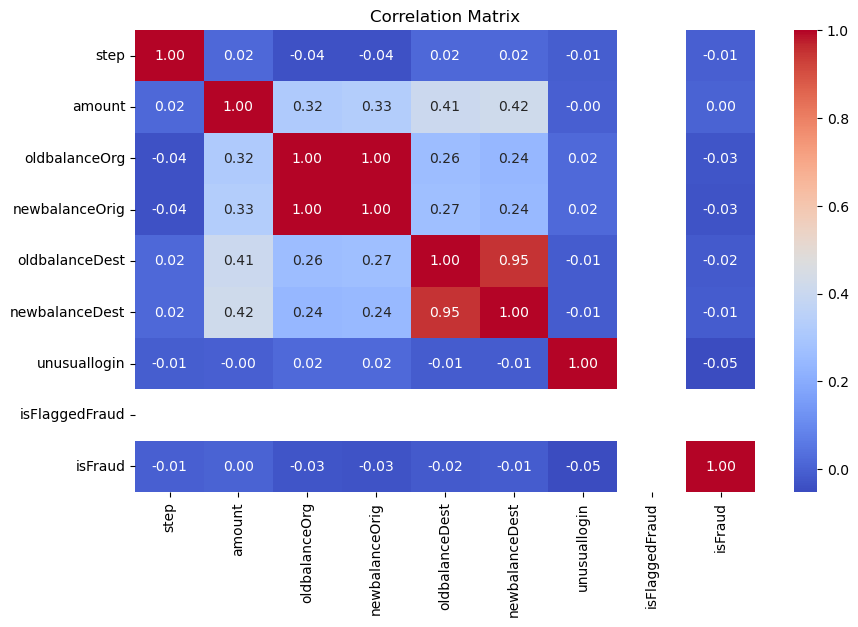

In [359]:
numeric_Data=Data.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_Data.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

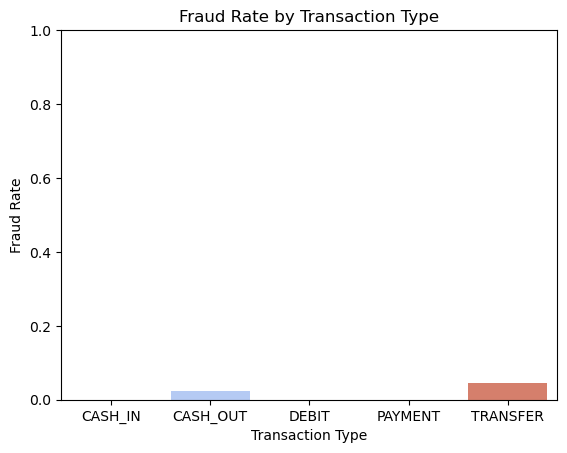

In [360]:
fraud_rate_by_type =Data.groupby('type')['isFraud'].mean().reset_index()

sns.barplot(x='type', y='isFraud', data=fraud_rate_by_type, palette='coolwarm')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.ylim(0, 1)
plt.show()


***Feature Encoding***

In [364]:
La_En = LabelEncoder()
Data['nameOrig'] = La_En.fit_transform(Data['nameOrig'])
Data['nameDest'] = La_En.fit_transform(Data['nameDest'])
Data['branch'] = La_En.fit_transform(Data['branch'])
Data['Acct type'] = La_En.fit_transform(Data['Acct type'])
Data['Time of day'] = La_En.fit_transform(Data['Time of day'])

In [366]:
Data['Date of transaction'] = pd.to_datetime(Data['Date of transaction'], dayfirst=True)

Data['day'] = Data['Date of transaction'].dt.day
Data['month'] = Data['Date of transaction'].dt.month
Data['year'] = Data['Date of transaction'].dt.year

Data.drop('Date of transaction', axis=1, inplace=True)


In [368]:
X=Data.drop('isFraud',axis=1)
Y=Data['isFraud']

In [370]:
categorical_columns = ['type']


ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_columns)  
    ],
    remainder='passthrough'  
)


X_encoded = ct.fit_transform(X) 

***Feature Scailing***

In [373]:
x_train,x_test,y_train,y_test=train_test_split(X_encoded,Y,test_size=0.2)

In [375]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

***Logistic Regression***

In [380]:
classifier=LogisticRegression(class_weight='balanced')
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [382]:
y_pred=classifier.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
isFraud,
0.0,0.0
0.0,1.0
0.0,0.0
0.0,0.0
0.0,0.0
...,...
0.0,0.0
0.0,0.0
0.0,0.0


In [384]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1701    3]
 [ 207    9]]
0.890625


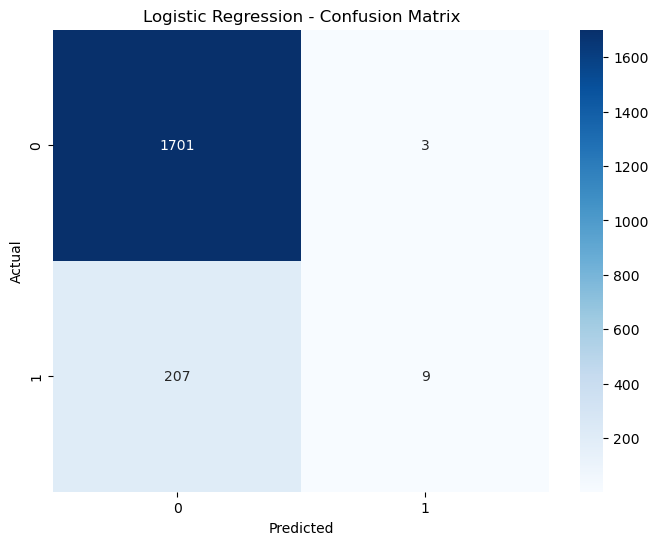

In [386]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


***K-Nearest Neghbours (KNN)***

In [389]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [391]:
y_pred=classifier.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
isFraud,
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
...,...
0.0,0.0
0.0,0.0
0.0,0.0


In [393]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1908   12]
 [   0    0]]
0.99375


***Decision Tree Classifier***

In [397]:
classifier=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=3)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

In [399]:
y_pred=classifier.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
isFraud,
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
...,...
0.0,0.0
0.0,0.0
0.0,0.0


In [401]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1803    1]
 [ 105   11]]
0.9447916666666667


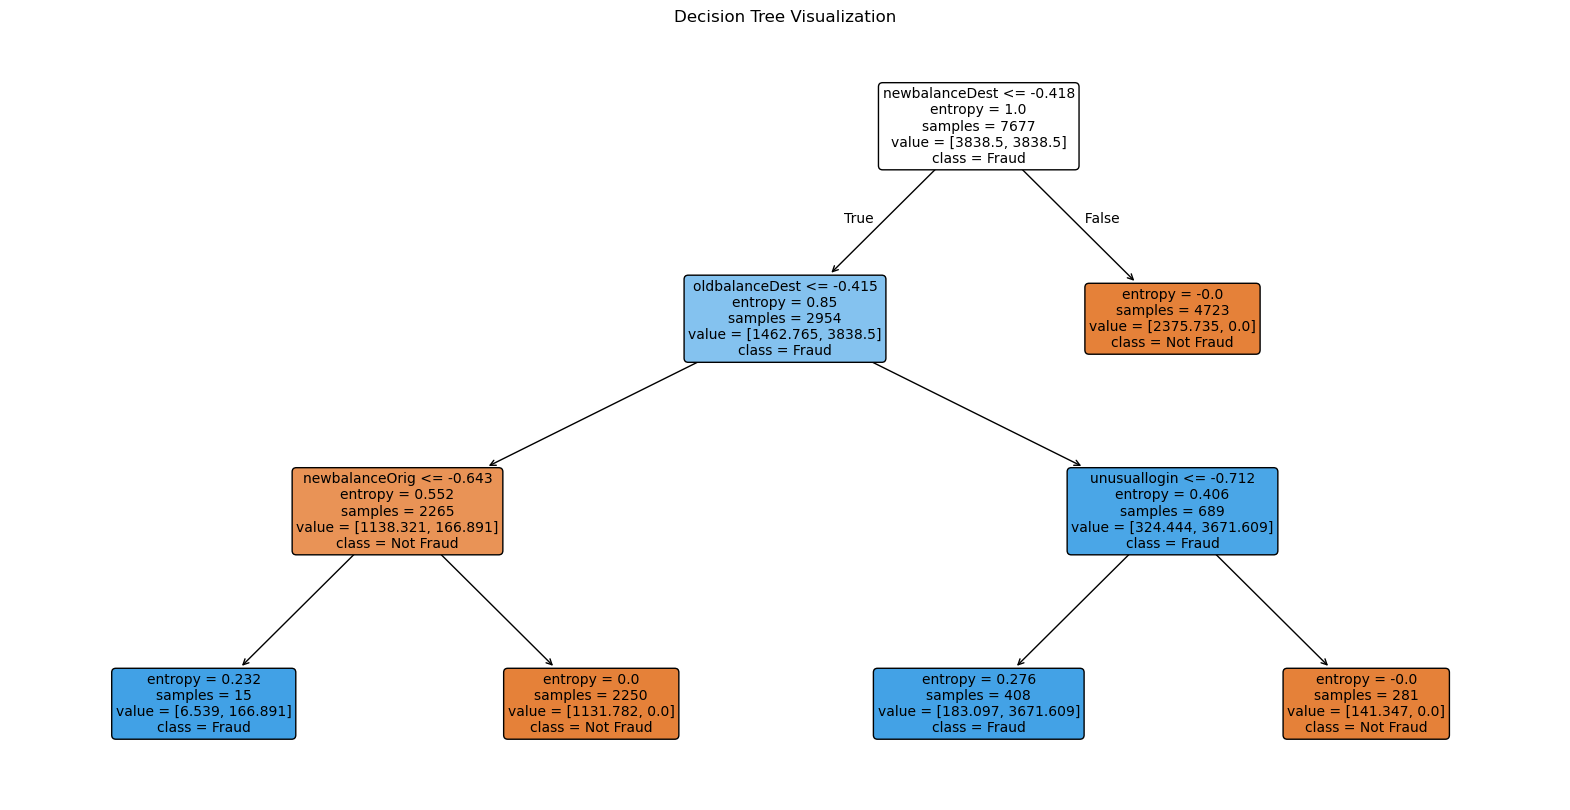

In [403]:
plt.figure(figsize=(20, 10))
plot_tree(classifier, 
          filled=True, 
          feature_names=X.columns if hasattr(X, 'columns') else None, 
          class_names=['Not Fraud', 'Fraud'],
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization")
plt.show()

***Random Forest Classifier***

In [407]:
classifier=RandomForestClassifier(n_estimators=100,criterion='gini',class_weight='balanced',max_depth=5)
classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [408]:
y_pred= classifier.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
isFraud,
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
...,...
0.0,0.0
0.0,0.0
0.0,0.0


In [411]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_pred,y_test)

[[1878   30]
 [   2   10]]


0.9833333333333333

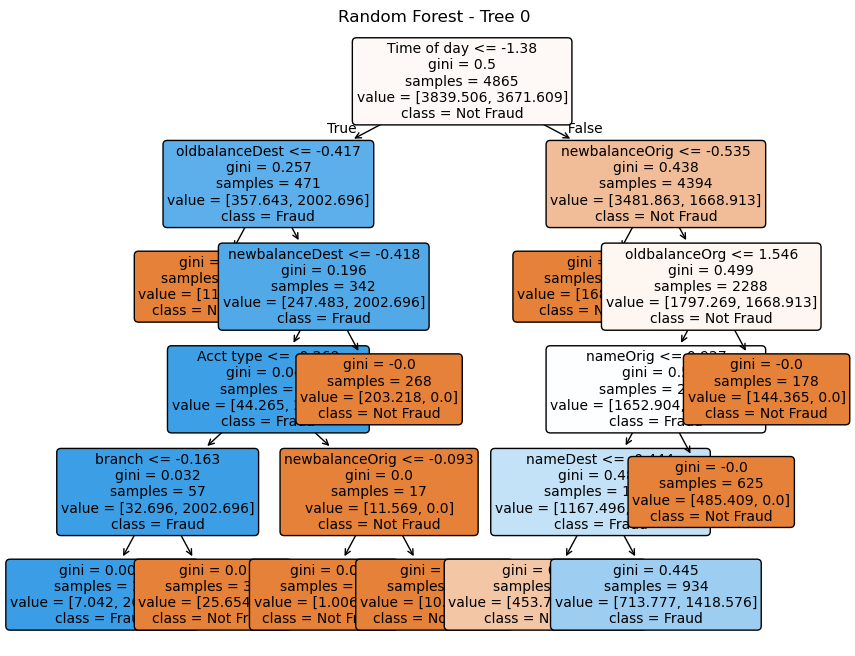

In [413]:
plt.figure(figsize=(10, 8))
plot_tree(classifier.estimators_[0], 
          filled=True, 
          rounded=True, 
          feature_names=X.columns if hasattr(X, 'columns') else None,
          class_names=['Not Fraud', 'Fraud'],
          fontsize=10)

plt.title("Random Forest - Tree 0")
plt.show()

***Support Vector Machine (SVM)***

In [417]:
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [418]:
y_pred=svm_model.predict(x_test)

In [421]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_pred,y_test)

[[1908    0]
 [  12    0]]


0.99375

The dataset is a synthetic fraud detection dataset containing details of bank transactions ,types of transactions old and new balances and the target variable isFraud.I have done the cleaning,feature engineering,encoding and scaling in the data preprocessing step.the models i have used here is Logistic Regression,K-Nearest Neighbor(KNN),Decision Tree,Random Forest,Support Vector Machine(SVM).The dataset was highly imbalanced(very few fraud cases) and handled it with class weights in models like Logistic Regression and Decision Tree it improved fraud detection perfomance.


***Here Random Forest Classifier was the most effective model,it achieved 97.8% accuracy,  with 10 out of 11 fraud cases correctly detected and only 1 missed case***
